In [1]:
from timeit import timeit
from IPython.display import display
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from joblib import dump, load
from imblearn.under_sampling import RandomUnderSampler

In [2]:
from compiledataset import load_dataset, compile_dataset

PATH = "/home/hampus/miun/master_thesis/Datasets"

datasets = {}

# dataset: pd.DataFrame = load_dataset(PATH + "/ORNL", "data_a.csv")
# dataset["remarks"] = "No DLC available"
# datasets["ROAD"] = dataset.to_dict("records")

dataset: pd.DataFrame = load_dataset(PATH + "/Survival", "data.csv")
dataset["remarks"] = "-"
datasets["Survival"] = dataset.to_dict("records")

# dataset: pd.DataFrame = load_dataset(PATH + "/Hisingen", "data.csv")
# dataset["remarks"] = "-"
# datasets["Hisingen"] = dataset.to_dict("records")


df = compile_dataset(datasets)
df.drop(columns=["d0", "d1", "d2", "d3", "d4", "d5", "d6", "d7", "ID", "DLC", "t"], inplace=True, errors="ignore")

dataset = None # Release memory, as it isn't used for now
datasets = None

display(df)

2022-03-24 12:10:02.463533: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-24 12:10:02.463549: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-24 12:10:03.567601: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 12:10:03.568059: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-24 12:10:03.568113: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.s

,dt,dt_ID,dt_ID_d0,dt_ID_d1,dt_ID_d2,dt_ID_d3,dt_ID_d4,dt_ID_d5,dt_ID_d6,dt_ID_d7,name,dataset,type,Label
0,0.000444,0.009978,0.037534,0.038773,0.038514,0.009992,0.009993,0.021248,0.335226,0.628803,Fuzzy_dataset_SONATA,Survival,none,0
1,0.000232,0.009977,0.039973,0.011470,0.011503,0.009993,0.009993,0.009993,0.013673,0.014938,Fuzzy_dataset_SONATA,Survival,none,0
2,0.000248,0.009981,0.009991,0.009989,0.009991,0.009991,0.009991,0.009991,0.009991,0.009991,Fuzzy_dataset_SONATA,Survival,none,0
3,0.000234,0.009978,0.039858,0.012100,0.011721,0.009993,0.009993,0.009993,0.009993,0.009992,Fuzzy_dataset_SONATA,Survival,none,0
4,0.000241,0.009978,0.009993,0.080203,0.009993,0.048989,0.009993,0.009993,0.009993,0.009993,Fuzzy_dataset_SONATA,Survival,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735835,0.000248,0.020620,0.020620,0.020620,0.020620,0.020620,0.020620,0.020620,0.020620,0.020620,FreeDrivingData_20171231_Spark,Survival,none,0
1735836,0.000235,0.013305,0.013305,0.013305,0.013305,0.013305,0.013305,0.013305,0.013305,0.013305,FreeDrivingData_20171231_Spark,Survival,none,0
1735837,0.000242,0.013092,0.013092,0.013092,0.013092,0.013092,0.013092,0.013092,0.013092,0.013092,FreeDrivingData_20171231_Spark,Survival,none,0
1735838,0.000435,0.012329,0.012329,0.012329,0.012329,0.012329,0.012329,0.012329,0.012329,0.012329,FreeDrivingData_20171231_Spark,Survival,none,0


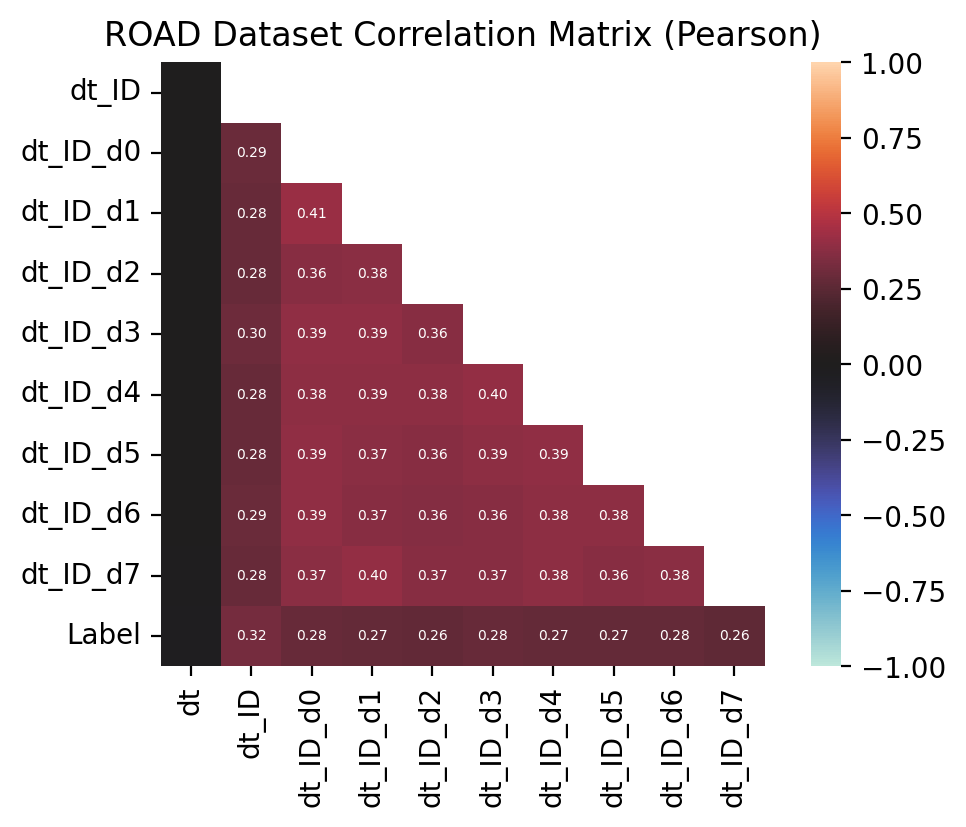

In [3]:
from plot_tools import plot_correlation_matrix

plot_correlation_matrix(df.drop(columns=["dataset", "type", "name", "ID", "DLC", "t"], errors="ignore"))

In [4]:
df = df.loc[df["type"] != "masq"]
# df = df.loc[(df["type"] == "fuzz") | (df["type"] == "none")]

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df.loc[:, (df.columns != "type") & (df.columns != "dataset") & (df.columns != "name") & (df.columns != "Label")] = StandardScaler(copy=True).fit_transform(
    df.loc[:, (df.columns != "type") & (df.columns != "dataset") & (df.columns != "name") & (df.columns != "Label")]
)

display(df)

,dt,dt_ID,dt_ID_d0,dt_ID_d1,dt_ID_d2,dt_ID_d3,dt_ID_d4,dt_ID_d5,dt_ID_d6,dt_ID_d7,name,dataset,type,Label
0,0.025851,-0.124694,-0.102605,-0.101264,-0.121815,-0.107964,-0.117501,-0.112989,-0.024493,-0.000134,Fuzzy_dataset_SONATA,Survival,none,0
1,-0.330970,-0.124696,-0.101924,-0.109152,-0.129351,-0.107964,-0.117501,-0.116268,-0.117633,-0.169081,Fuzzy_dataset_SONATA,Survival,none,0
2,-0.304066,-0.124692,-0.110304,-0.109580,-0.129773,-0.107964,-0.117501,-0.116269,-0.118700,-0.170443,Fuzzy_dataset_SONATA,Survival,none,0
3,-0.327356,-0.124694,-0.101956,-0.108970,-0.129290,-0.107964,-0.117501,-0.116268,-0.118699,-0.170443,Fuzzy_dataset_SONATA,Survival,none,0
4,-0.316113,-0.124694,-0.110303,-0.089295,-0.129772,-0.096961,-0.117501,-0.116268,-0.118699,-0.170442,Fuzzy_dataset_SONATA,Survival,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735835,-0.304066,-0.114625,-0.107333,-0.106509,-0.126807,-0.104965,-0.114369,-0.113172,-0.115621,-0.167518,FreeDrivingData_20171231_Spark,Survival,none,0
1735836,-0.325750,-0.121547,-0.109377,-0.108622,-0.128848,-0.107029,-0.116525,-0.115303,-0.117740,-0.169531,FreeDrivingData_20171231_Spark,Survival,none,0
1735837,-0.314105,-0.121748,-0.109437,-0.108683,-0.128907,-0.107089,-0.116587,-0.115365,-0.117802,-0.169589,FreeDrivingData_20171231_Spark,Survival,none,0
1735838,0.011150,-0.122470,-0.109650,-0.108904,-0.129120,-0.107305,-0.116812,-0.115588,-0.118023,-0.169799,FreeDrivingData_20171231_Spark,Survival,none,0


In [6]:
# Stratify on the sub-dataset
X_train = df.drop(columns="name")
y_train = df["name"]

df = None # Release memory

# Split dataset into training and test data, stratify by the type of attack
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)

# Use feature "Label" as classification label
d_temp: pd.DataFrame = pd.concat([X_train, y_train], axis="columns")
X_train, y_train = d_temp.drop(columns="Label"), d_temp["Label"]
d_temp: pd.DataFrame = pd.concat([X_test, y_test], axis="columns")
X_test, y_test = d_temp.drop(columns="Label"), d_temp["Label"]
d_temp = None # Release memory

In [7]:
rus = RandomUnderSampler(random_state=0)
X_train, y_train = rus.fit_resample(X_train, y_train)
bintr = np.bincount(y_train)
binte = np.bincount(y_test)
print(f"Labels\t\tTraining\tTesting\nNormal\t\t{bintr[0]}\t\t{binte[0]}\nAttack\t\t{bintr[1]}\t\t{binte[1]}")

Labels		Training	Testing
Normal		128216		465654
Attack		128216		55098


In [8]:
# X_test = X_test.loc[(X_test["type"] == "fuzz") | (X_test["type"] == "none")]
# y_test = y_test.loc[X_test.index]

In [9]:
# train_index = X_train.loc[X_train["dataset"] == "ROAD"].index
# test_index = X_test.loc[X_test["dataset"] == "Survival"].index

# X_train = X_train.loc[train_index]
# y_train = y_train.loc[train_index]

# X_test = X_test.loc[test_index]
# y_test = y_test.loc[test_index]

In [10]:
X_train.drop(columns=["type", "dataset", "name"], inplace=True)
X_test.drop(columns=["type", "dataset", "name"], inplace=True)

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, random_state=0, max_leaf_nodes=300, max_features="log2", warm_start=True)
clf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_leaf_nodes=300, n_estimators=20,
                       random_state=0, warm_start=True)

In [22]:
scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=10, n_jobs=-1)
print("Training F1: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

pred = clf.predict(X_test)

f1_scores = f1_score(y_test, pred, average='weighted')
print("Testing F1:  %0.4f(+/- %0.4f)" % (f1_scores.mean(), f1_scores.std()))

kappa_scores = cohen_kappa_score(y_test, pred)
print("Kappa score:  %0.4f(+/- %0.4f)" % (kappa_scores.mean(), kappa_scores.std()))

Training F1: 0.9987 (+/- 0.0002)
Testing F1:  0.9990(+/- 0.0000)
Kappa score:  0.9946(+/- 0.0000)


Plot test data predictions

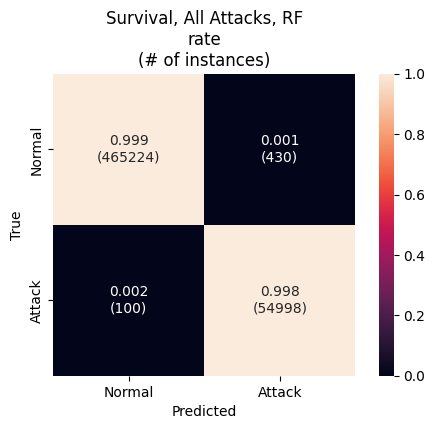

In [23]:
from plot_tools import plot_confusion_matrix

plot_confusion_matrix(y_test, pred, "Survival, All Attacks, RF\nrate\n(# of instances)")

Plot train data predictions

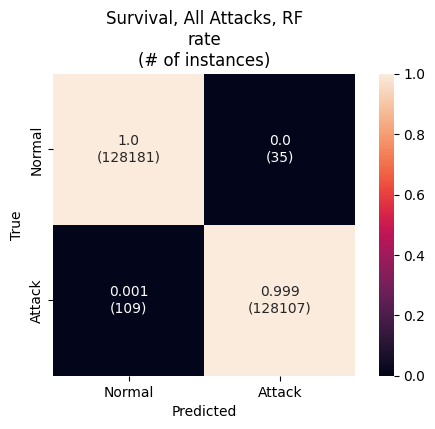

In [24]:
pred_train = clf.predict(X_train)

plot_confusion_matrix(y_train, pred_train, "Survival, All Attacks, RF\nrate\n(# of instances)")

Add trees trained on the FPs and FNs

In [25]:
clf.set_params(n_estimators=30) # Add another 20 trees for the FN and FPs
clf.fit(X_train.loc[y_train != pred_train], y_train.loc[y_train != pred_train])

RandomForestClassifier(max_features='log2', max_leaf_nodes=300, n_estimators=30,
                       random_state=0, warm_start=True)

Plot test data predictions again

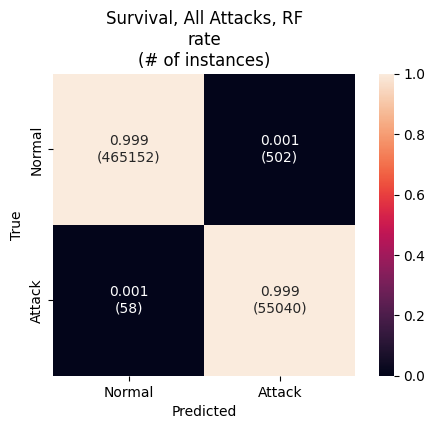

In [26]:
pred_test = clf.predict(X_test)

plot_confusion_matrix(y_test, pred_test, "Survival, All Attacks, RF\nrate\n(# of instances)")

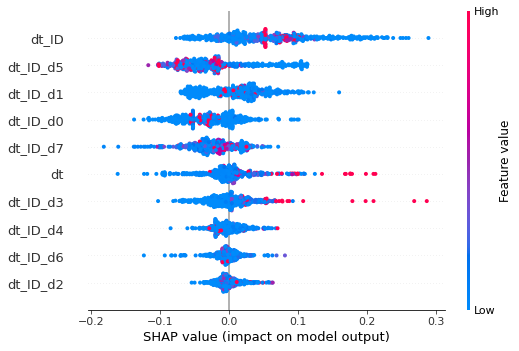

In [27]:
import shap
from shap_tools import *


exp = shap.TreeExplainer(clf)

# # Make sure that the ingested SHAP model (a TreeEnsemble object) makes the
# # same predictions as the original model
# assert np.abs(exp.model.predict(X_test_sample) - clf.predict_proba(X_test_sample)).max() < 1e-4

# # Make sure the SHAP values sum up to the model output (this is the local accuracy property)
# assert np.abs(exp.expected_value + exp.shap_values(X_test_sample).sum(1) - clf.predict_proba(X_test_sample)).max() < 1e-4


shap_false = get_explanation(exp, X_test.loc[y_test != pred])
shap_true = get_explanation(exp, X_test.loc[y_test == pred])

plot_beeswarm(shap_false)

# shap_values = explainer(X_test.sample(1000, random_state=0))
# shap_values = shap.Explanation(shap_values[:, :, 1], feature_names=X_test.columns)

# shap.summary_plot(shap_values)


# shap.waterfall_plot(shap.Explanation(values=shap_values[int("which_class")][row], 
#                                          base_values=explainer.expected_value[int(which_class)], 
#                                          data=X_test.iloc[row],  # added this line
#                                          feature_names=X_test.columns.tolist()))
# shap.force_plot(explainer.expected_value[1], shap_values[1], features=X_test[:1], feature_names=X_test.columns)

# shap.plots.scatter(shap_values[:,"ones_w"])
# shap.summary_plot(shap_values[1], X_test.columns)

# plt.show()

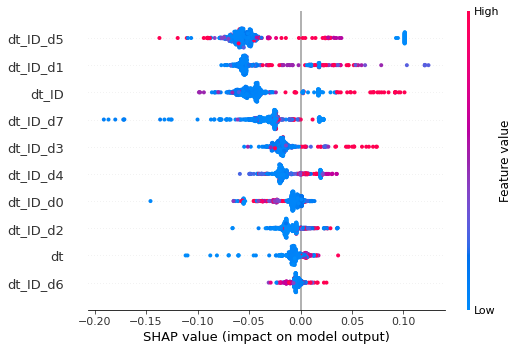

In [28]:
plot_beeswarm(shap_true)